# Feature extraction

----------------------------------------------------
### Machine Learning

**Vanessa Gómez Verdejo** vanessag@ing.uc3m.es,
*Emilio Parrado Hernández eparrado@ing.uc3m.es*

----------------------------------------------------

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 1. Introduction
**Feature extraction** methods exploit the data structure to reduce the dimensionality of the input space


  <img align="center" src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/PCA/FE_intro.jpg" width="40%" >

while at the same time:
* Use only relevant data, i.e, remove irrelevant/noisy/correlated components minimizing the loss of *relevant* information
* Discover good combinations of input variables (feature engineering).

These characteristics allow us to simplify the ML stage since:
* We reduce the number of parameters in the classifier (alliviating the *curse of dimensionality*)
* We can get to *bend* the input space to better fit our task
* We obtain a compact data representation (crucial for large datasets)



## Some notation (review)

Consider we have a dataset with $N$ observations where each data, $\mathbf{x}^{(n)}\in\mathbb{R}^D$, belongs to a $D$ dimensional space. That is, each data is a column vector with $D$ elements:
$$
{\bf x} = \left[ \begin{array}{c}x_1\\ \vdots\\ x_D \end{array}\right].
$$ Besides, for the sake of simplicity, let's consider that these data have zero mean.

On the other hand, for each data, we are going to find a new representation ${\bf x^\prime}$ in a lower dimensional space ($K<D$):
$$
{\bf x^\prime} = \left[ \begin{array}{c}x^\prime_1 \\ \vdots \\ x^\prime_{K} \end{array}\right].
$$

This new data representation results from the application of a linear transformation to the original data defined by:
$$ {\bf x^\prime} = {\bf U}^\top {\bf x}^\top$$

where ${\bf U}$ is a transformation matrix of size $D\times K$:
$${\bf U}=\left[ \begin{array}{ccc}
u_{1,1} \ldots u_{1,K}\\
\vdots \ddots \vdots\\
u_{D,1} \ldots u_{D,K}\\
\end{array}\right] $$

The goal of the **feature extraction** algorithm is to write and solve an optimization problem that finds out the correct transformation matrix ${\bf U}$.





# 2. Principal Component Analysis (Review)

**Principal Component Analysis** can be one of the most mentioned and known data analysis method. It’s probably the most advised preprocessing step.

PCA goal is to obtain a new, reduced  set of $K<D$ orthogonal variables, the so-called principal components that maximize the variance contained in the data. The principal components are linear combinations of the input variables, but sorted in decreasing order of variance.

<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/PCA/PCA_1.png" width="40%" >

In matrix notation, the purpose of PCA can be written as finding a projection matrix ${\bf U}$ able to transform the $D\times N$ data matrix ${\bf X}$ into the $K \times N$ matrix ${\bf X'}$:

$$ {\bf X'} = {\bf U}^\top {\bf X}^\top$$

so that the variance contained in the data is maximized. Each column of the matrix ${\bf U}$ is a **principal component**, and it will provide a new dimension of the data in the projected space: the principal components act as a vector basis in the projected space.

PCA is **unsupervised**, one does not need targets to compute PCA!!






## 2.1 Mathematical formulation

$$ {\bf U} = \underset{\bf U} {\mathrm{argmax}} ~{\rm Tr} \left\lbrace {\bf U}^T {\bf X}^T {\bf X} {\bf U}\right\rbrace  = \underset{\bf U} {\mathrm{argmax}} ~{\rm Tr}\left\lbrace {\bf U}^T {\bf C_{XX}} {\bf U}\right\rbrace $$
$$ {\rm s.t.} ~~{\bf U}^T {\bf U}={\bf I}$$

**Solution:**

Let's start considering the projection onto a one-dimensional space ($K = 1$). So, we want to solve the following optimization problem:

$$ {\bf u}_1 = \underset{{\bf u}_1} {\mathrm{argmax}} ~{\bf u}_1^{\top} {\bf C_{XX}} {\bf u}_1 $$
$$ {\rm s.t.} ~~{\bf u}_1^{\top} {\bf u}_1=1$$

  If we apply Lagrange multipliers, we can include the constraint into  functional by means of the lagrange multiplier $\lambda_1$ and we arrive to an unconstraint problem

$$ {\bf u}_1 = \underset{{\bf u}_1} {\mathrm{argmax}} ~{\bf u}_1^{\top} {\bf C_{XX}} {\bf u}_1 + \lambda_1 \left(1-{\bf u}_1^{\top} {\bf u}_1 \right)$$

by making its derivate equal to zero, we obtain that the optimum solution has to satisfiy

$${\bf C_{XX}} {\bf u}_1 = \lambda_1 {\bf u}_1 $$

which indicates that ${\bf u}_1$ must be an eigenvector of the covariance matrix ${\bf C_{XX}}$ and $\lambda_1$ is its associated eigenvalue.

Besides, if we left-multiply this expression by ${\bf u}_1^{\top}$ and make
use of ${\bf u}_1^{\top} {\bf u}_1=1$, we obtain that

$${\bf u}_1^{\top} {\bf C_{XX}} {\bf u}_1 = \lambda_1 $$

that is, the variance of the projected data by the eigenventor ${\bf u}_1 $ is equal to its associated eigenvalue $\lambda_1$. So, we can get the maximum projected variance, with a single projection, if we set this first principal component ${\bf u}_1$ as the eigenvector with the largest eigenvalue $\lambda_1$. Later, we can define additional principal components in an incremental fashion by choosing each new direction as the one eigenvector with the next highest eigenvalue so that the projected variance is maximized.

So, we can obtain the first $K$ projections of the PCA algorithm by solving the following eigenvalue problem

$$ {\bf C_{XX}} {\bf u} = \lambda {\bf u} $$

So, the projection matrix, $\bf U$, consists of the first eigenvectors of $\bf  C_{xx}$ (i.e., those associated with largest eigenvalues)

$$ {\bf U} = {\rm eigs}({\bf C_{XX}}) $$


## 2.2 PCA algorithm

* **Input**: $\bf X$ ($D\times N$) data matrix, each datum is a column

* **Process**:

    1.- $\mathbf m = {1\over N} \sum_{n=1}^N{\mathbf x^{(n)}}$

    2.- $\bf C_{XX} = {1\over N} \sum_{n=1}^N{(\mathbf x^{(n)} - \mathbf m)(\mathbf x^{(n)} - \mathbf m)}^\top$

    3.- $\bf U,\Lambda = \mbox{eig}(C_{XX})$
    
    4.- $\mathbf X^\prime = (\bf U_{:K})^\top \mathbf X$

* **Output**: Transformed data $\mathbf X^{\prime}$

where eig($\bf A$) is a function that returns the eigenvectors (columns of $\bf U$) and eigenvalues (diagonal of $\Lambda$) of $\bf A$ and $\bf U_{:k}$ means the first $k$ columns of matrix $\bf U$.


**REFERENCE**

Jollife I.T. (1986) Principal Component Analysis. Springer-Verlag.

## 2.3 PCA explains variance

- Each Principal Component **explains an amount of the total variance contained in the data set** equal to the size of the corresponding eigenvalue of $\bf C_{XX}$. Notice the trace of $\bf C_{XX}$ (sum of the variances) is the total variance contained in the data and that the sum of the eigenvalues is equal to the trace of a matrix.

- In this sense, the projection of the data on the subset of the first $K$ principal components is the **best reconstruction** of these data with just $K$ components in the sense of maximizing the variance captured by the reconstruction.

- If the data lies in a **subspace of rank $K<D$**, then the first $K$ principal components are a basis for that subspace and the data is lossless compressed in $K$ components. By lossless we mean without loss of information as these $K$ principal components capture all the variance present in data.

- If the data contains **small amounts of noise**, usually the noise components would reflect in eigenvalues with smaller values, thus removed by throwing away the less principal components.

# 3. Let's play with data

This section presents some experimental work over a face detection problem where you will be able to test the performance improvements provided by the feature extraction process. Besides, from a qualitative point of view, you will analyze the extracted features by plotting the eigenvectors defining the feature extraction process.

Later, we will analyze the discriminatory capability of the extracted features with a linear SVM classifier. To implement the different approaches we will build on the [Scikit-Learn](http://scikit-learn.org/stable/) python toolbox.


## 3.1. Download and prepare the data

This dataset consists of ten different images taken from 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).
    
The next code includes the lines to download this data set and create the training, validation and test data partitions, as well as normalize them.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler


###############################################################################
# Download the data, if not already on disk and load it as numpy arrays
print('The first time that you download the data it can take a while...')
olivetti_people = fetch_olivetti_faces()

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = olivetti_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = olivetti_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
Y = olivetti_people.target
n_classes = np.unique(Y).shape[0]

print("Dataset size information:")
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


###############################################################################
# Preparing the data

# Initialize the random generator seed to compare results
np.random.seed(1)

# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

# split into a training and validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.333)

# Normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# Binarize the labels for supervised feature extraction methods
set_classes = np.unique(Y)
Y_train_bin = label_binarize(Y_train, classes=set_classes)
Y_val_bin = label_binarize(Y_val, classes=set_classes)

print("Number of training samples: %d" % X_train.shape[0])
print("Number of validation samples: %d" % X_val.shape[0])
print("Number of test samples: %d" % X_test.shape[0])

The first time that you download the data it can take a while...
downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Dataset size information:
n_features: 4096
n_classes: 40
Number of training samples: 200
Number of validation samples: 100
Number of test samples: 100


### Representing some example faces

Next cells include the `plot_gallery( )` function, which let you plot any of the face images from the data set and in later sections plot the eigenvectors provided by the feature selection process. Besides, as an example, the function is used to plot some training data.

In [3]:
import matplotlib.pyplot as plt
def plot_gallery(images, titles, h, w, n_row=4, n_col=10):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(images.shape[0]):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.colorbar()
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

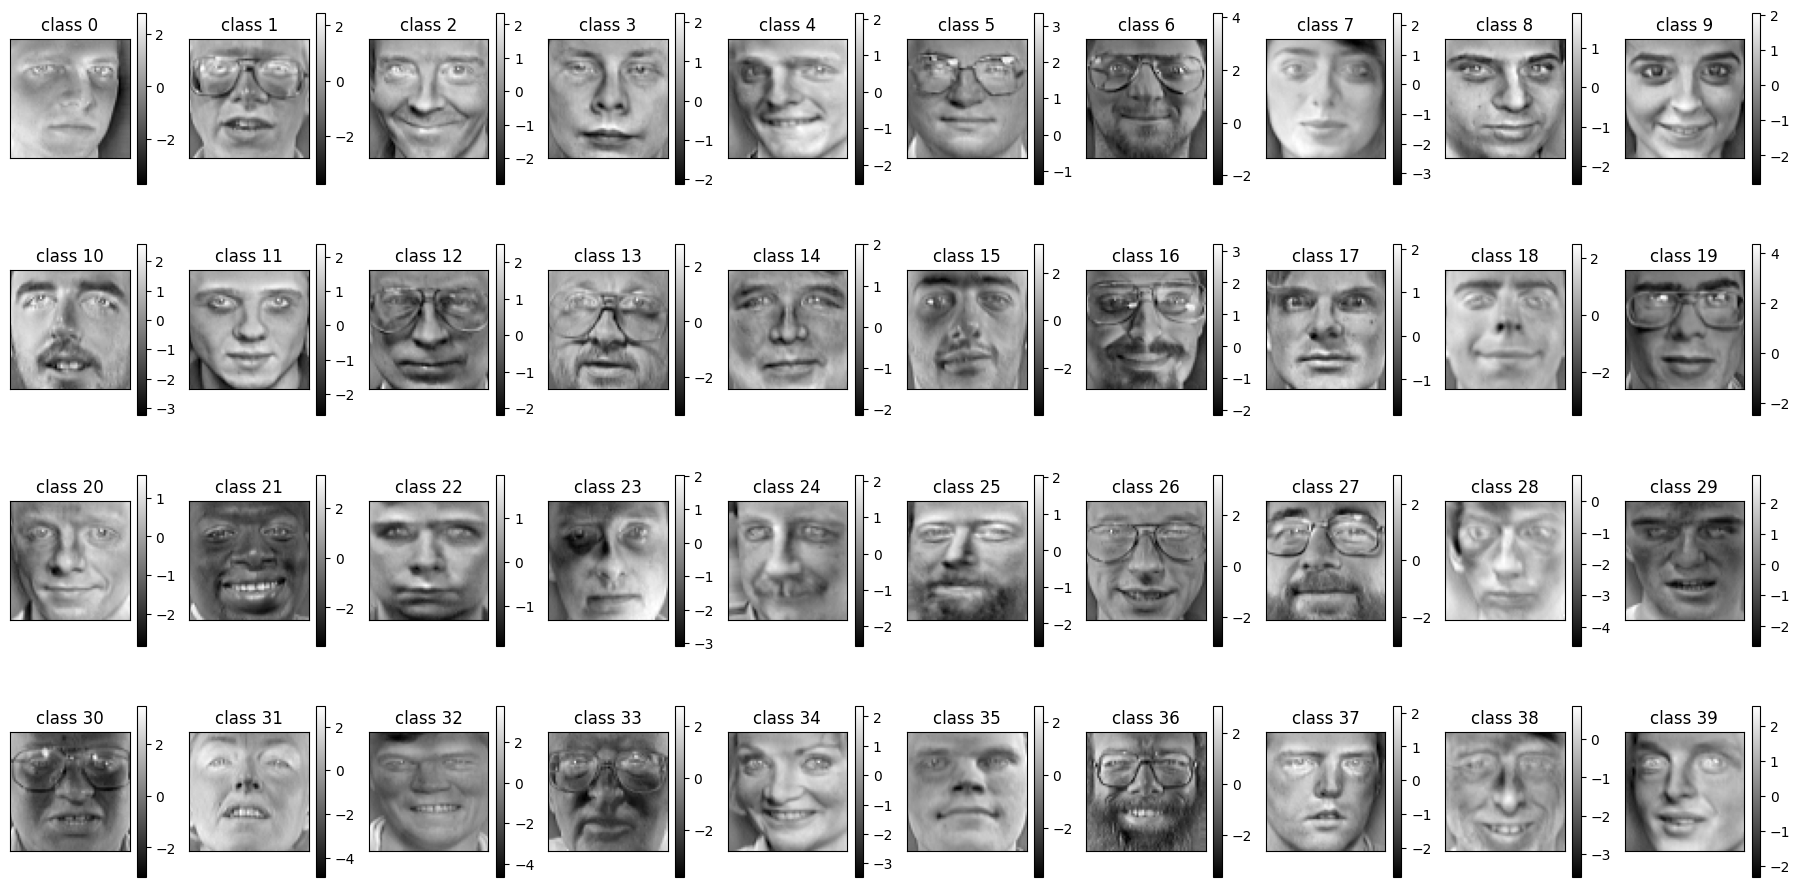

In [4]:
# As example, we plot a face of each class (or person)
titles = ['class '+str(c) for c in set_classes]
ind_faces = [np.where(Y_train == c)[0][0] for c in set_classes]

plot_gallery(X_train[ind_faces,:], titles, h, w)

## 3.2. Feature extraction with PCA


Let's use the [PCA( )](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) method to find the projections maximizing the variance of the projected data.

In [5]:
from sklearn.decomposition import PCA

N_feat_max=100

my_pca = PCA(n_components=N_feat_max).fit(X_train)
P_train = my_pca.transform(X_train)
P_val = my_pca.transform(X_val)
P_test = my_pca.transform(X_test)

dim_train = P_train.shape[1]
dim_val = P_val.shape[1]
dim_test = P_test.shape[1]

print('Dimensions of training data are: ' + str(dim_train))
print('Dimensions of validation data are: ' + str(dim_val))
print('Dimensions of test data are: ' + str(dim_test))

Dimensions of training data are: 100
Dimensions of validation data are: 100
Dimensions of test data are: 100


## 3.3 Analyzing eigenvectors and eigenvalues

The analysis of eigenvectors in face detection problems is quite common, in fact, they are known as **eigenfaces**. Note that each feature of each transformed instance is the scalar product between the corresponding input face and the corresponding eigenface. Lighter regions of the eigenfaces will contribute positively to generate the new feature, whereas darker regions will contribute negatively.

On the other hand, the **eigenvalues** allow us to know the importance of each principal component (the higher the eigenvalue, the more important the component). Analyzing the eigenvalues we can know which components are the most relevant and, even, know which are unnecessary and how many new variables we can use without a great loss of information.

Execute the following code cells to plot the first eigenvectors and the evolution of the eigenvalues.

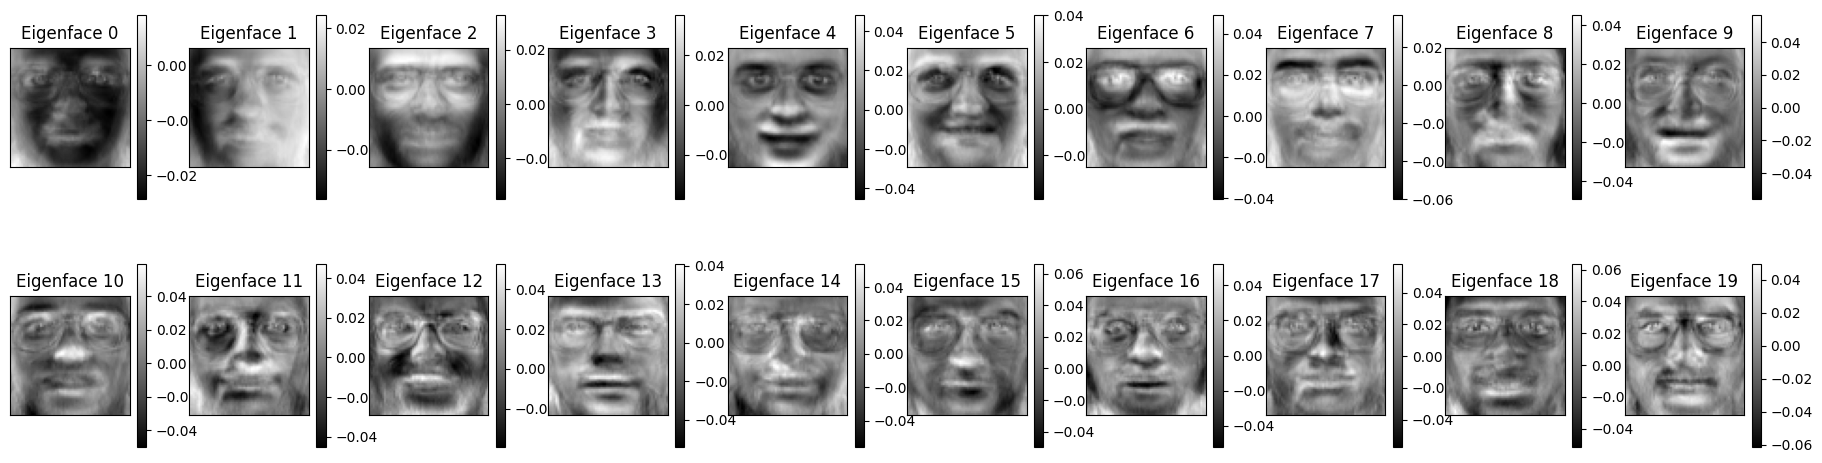

In [6]:
# Plot eigenfaces
n_eigenfaces=20
titles = ['Eigenface '+str(num) for num in range(n_eigenfaces)]
eigenfaces = my_pca.components_.reshape((N_feat_max, h, w))
plot_gallery(eigenfaces[:n_eigenfaces,:,:], titles, h, w, n_row=2, n_col=10)

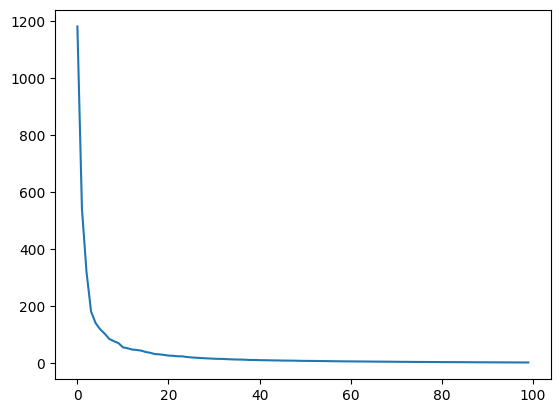

In [7]:
# Analyze eigenvalues
eigenvalues = my_pca.explained_variance_
plt.figure()
plt.plot(eigenvalues, label='Evolution eigenvalues')
plt.show()

In view of this figure, how many principal components do you think are sufficient to get a good representation of the data and not lose relevant information?

Text(0, 0.5, 'Percentage of the variance')

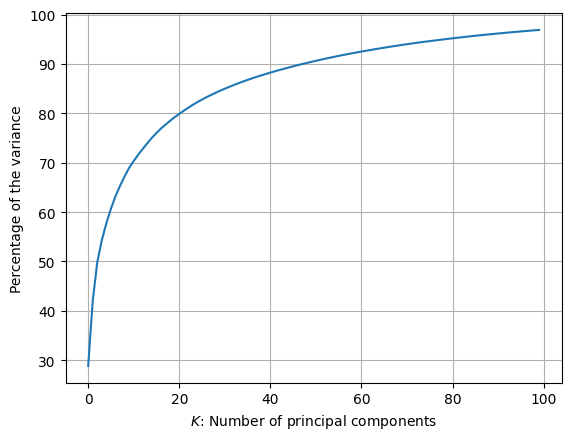

In [8]:
# 1.- Compute an estimation of the variance in data using the training set

data_variance = np.sum(np.var(X_train,0))

# 2.- plot the cummulative sum of the sorted eigenvalues divided by the total variance of the data
# 2.1.- express the y-axis in percentage
plt.figure()
plt.plot(100*np.cumsum(eigenvalues)/data_variance, label='Evolution eigenvalues')
plt.grid()
plt.xlabel('$K$: Number of principal components')
plt.ylabel('Percentage of the variance')

## 3.4 Dimensionality reduction

The main advantage of PCA lies in the fact that it allows us to reduce the dimensionality of the data. We can even summarize the input data into only 2 or 3 new features that can be used to visualize the data.

The next code cell shows how we can use 2 or 3 of the new features to represent the data of our data set.

Text(0, 0.5, 'Extracted Feature 2')

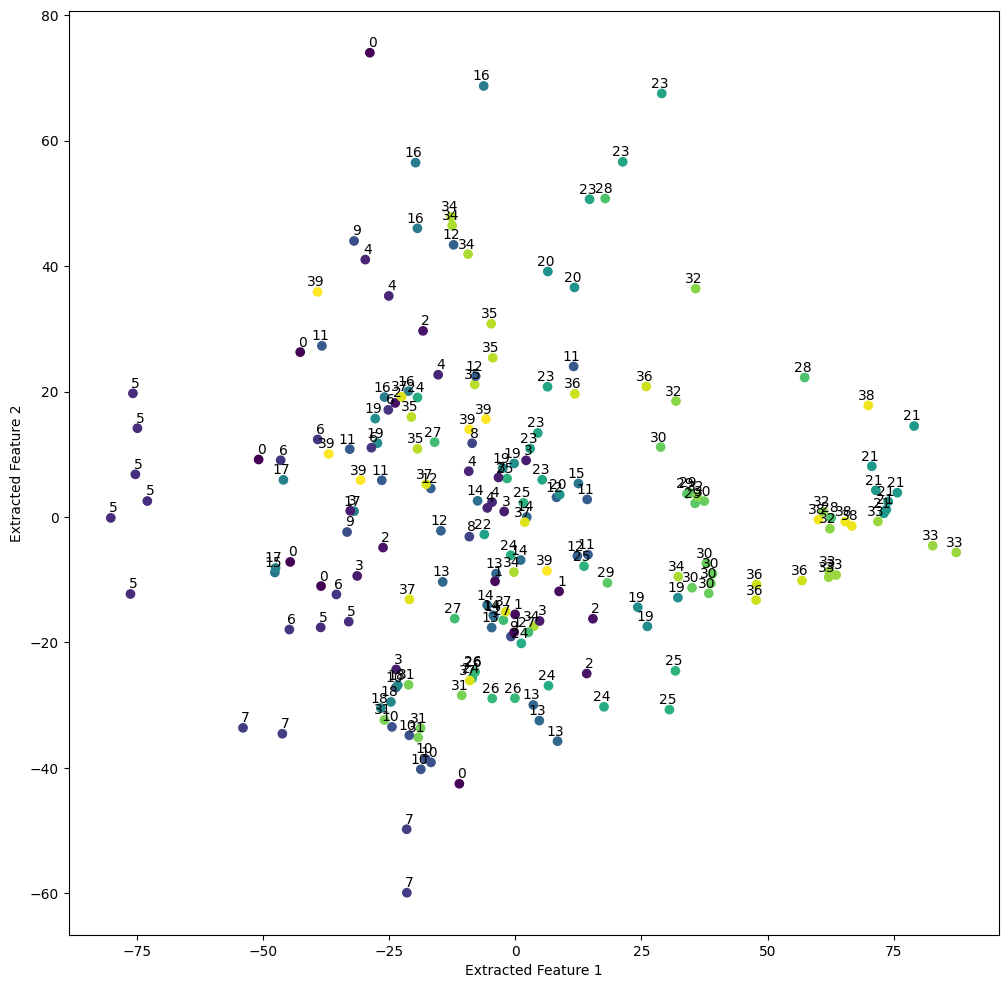

In [9]:
X_train_pca2 = P_train[:,:2]
plt.figure(figsize=(12,12))
plt.scatter(X_train_pca2[:, 0], X_train_pca2[:, 1], c=Y_train)

for i in range(len(X_train_pca2)):
        plt.annotate(Y_train[i],
                     xy=(X_train_pca2[i,0], X_train_pca2[i,1]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

plt.xlabel('Extracted Feature 1')
plt.ylabel('Extracted Feature 2')

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from pylab import figure

X_train_pca3 = P_train[:,:3]
fig = figure(figsize=(12,12)) #plt.figure(figsize=(12,12))
ax = Axes3D(fig)
ax.scatter(X_train_pca3[:, 0], X_train_pca3[:, 1], X_train_pca3[:, 2], c=Y_train)

for i in range(len(X_train_pca3)):
  ax.text(X_train_pca3[i,0], X_train_pca3[i,1], X_train_pca3[i,2],  '%s' % (str(Y_train[i])), size=10, zorder=1,  color='k')

ax.set_xlabel('Extracted Feature 1')
ax.set_ylabel('Extracted Feature 2')
ax.set_zlabel('Extracted Feature 3')
plt.show()

<Figure size 1200x1200 with 0 Axes>

## 3.5 Reconstruction from the principal components

The Principal Components form a basis that capture the most relevant information within data. Therefore, we can reconstruct the original data as a linear combination of the principal components, precisely weighted by the coordinates of the mapped data in the transformed space:

$$
\hat{\mathbf x} =  \bf U_{:K} \mathbf x^\prime
$$

The reconstruction error can be computed as
$$
\sqrt{(\mathbf x-\hat{\mathbf x})^\top (\mathbf x-\hat{\mathbf x})} =
\sqrt{\mathbf x^\top (\mathbb I - \bf U_{:K}\bf U_{:K}^\top)\mathbf x}
$$

The following cell plots the result of reconstructing one of the original images with a different number of principal components.

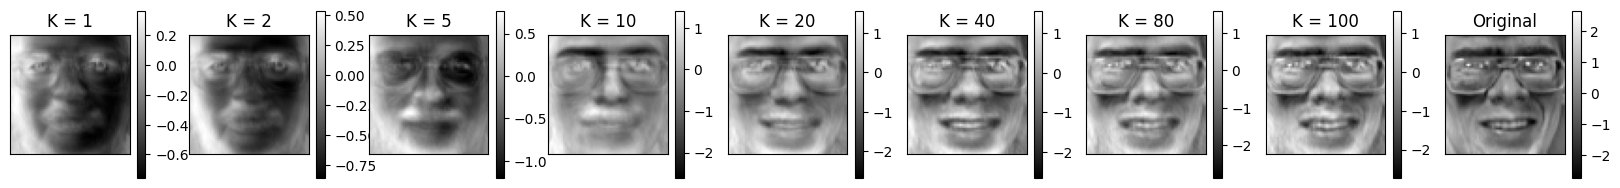

In [11]:
subject=27
D = X_train.shape[1]
n_reconst_list=[1,2, 5, 10, 20, 40, 80,  100] # Number of Principal Components
Reconstruct = np.empty((len(n_reconst_list)+1, D))

for ii,n_comp in enumerate(n_reconst_list):
    # Reconstruct image subjet using n_comp PCs
    Reconstruct[ii,:] = P_train[subject,0:n_comp+1].dot(my_pca.components_[0:n_comp+1,:])

# Original Image
Reconstruct[-1,:] = X_train[subject,:].copy()
titles = ['K = '+str(num) for num in n_reconst_list] + ['Original']
Reco = Reconstruct.reshape((len(n_reconst_list)+1, h, w))

plot_gallery(Reco, titles, h, w, n_row=6, n_col=10)


Now let's plot the evolution of the average reconstruction error for the whole training, validation and test sets (one curve per set) as a function of the number of PC used for the reconstruction


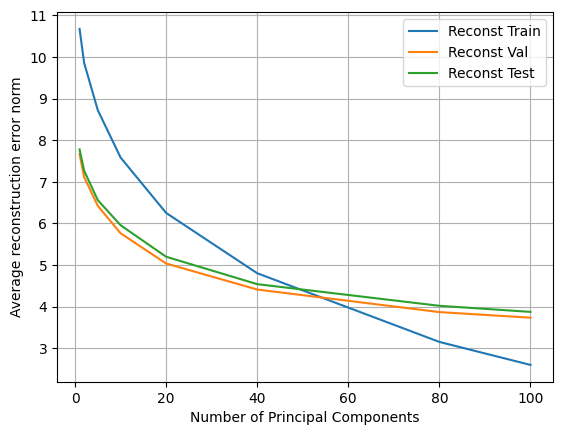

In [12]:
n_reconst_list=[1,2, 5, 10, 20, 40, 80,  100]
error_train = np.empty(len(n_reconst_list))
error_val = np.empty(len(n_reconst_list))
error_test = np.empty(len(n_reconst_list))

for ii,n_comp in enumerate(n_reconst_list):
    Reconstruct_train = P_train[:,0:n_comp+1].dot(my_pca.components_[0:n_comp+1,:])
    error_train[ii] = np.mean(np.linalg.norm(X_train-Reconstruct_train,axis=0))
    Reconstruct_val = P_val[:,0:n_comp+1].dot(my_pca.components_[0:n_comp+1,:])
    error_val[ii] = np.mean(np.linalg.norm(X_val-Reconstruct_val,axis=0))
    Reconstruct_test = P_test[:,0:n_comp+1].dot(my_pca.components_[0:n_comp+1,:])
    error_test[ii] = np.mean(np.linalg.norm(X_test-Reconstruct_test,axis=0))

plt.figure()
plt.plot(n_reconst_list, error_train, label='Reconst Train')
plt.plot(n_reconst_list, error_val, label='Reconst Val')
plt.plot(n_reconst_list, error_test, label='Reconst Test')
plt.xlabel('Number of Principal Components')
plt.ylabel('Average reconstruction error norm')
plt.grid()
plt.legend()

## 3.6 Performance evaluation

In this section you will use a linear SVM to evaluate the discriminatory capability of the extracted features.

Let's complete the next code to design the function `SVM_accuracy_evolution( )` which has to be able to compute the training, validation and test accuracies of a linear SVM (with the default penalty parameter).

The last lines of code let you run this function with the PCA projections and plot the result.

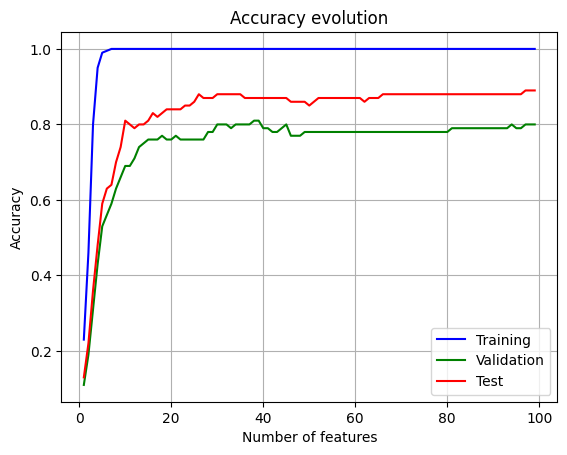

In [13]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

def SVM_accuracy_evolution(X_train_t,
                           Y_train,
                           X_val_t,
                           Y_val,
                           X_test_t,
                           Y_test):
    """Compute the accuracy of training, validation and test data for different the number of features

    Args:
        X_train_t (numpy dnarray): training data projected in the new feature space (number data x number dimensions).
        Y_train (numpy dnarray): labels of the training data (number data x 1).
        X_val_t (numpy dnarray): validation data projected in the new feature space (number data x number dimensions).
        Y_val (numpy dnarray): labels of the validation data (number data x 1).
        X_test_t (numpy dnarray): test data projected in the new feature space (number data x number dimensions).
        Y_test (numpy dnarray): labels of the test data (number data x 1).

    """

    # Define the model to train a liner SVM
    clf = svm.SVC(kernel='linear')

    acc_tr = np.empty(X_train_t.shape[1]-1)
    acc_val = np.empty(X_train_t.shape[1]-1)
    acc_test = np.empty(X_train_t.shape[1]-1)
    for i in range(1,X_train_t.shape[1]):
        # Train SVM classifier
        clf.fit(X_train_t[:,:i], Y_train)
        # Compute train, val and test accuracies and save in acc_tr, acc_val and acc_test
        acc_tr[i-1] =  clf.score(X_train_t[:,:i], Y_train)
        acc_val[i-1] = clf.score(X_val_t[:,:i], Y_val)
        acc_test[i-1] = clf.score(X_test_t[:,:i], Y_test)

    return acc_tr, acc_val,acc_test

# Run the function with the pca extracted features  and plot the result

[acc_tr, acc_val, acc_test] = SVM_accuracy_evolution(P_train,
                                                     Y_train,
                                                     P_val,
                                                     Y_val,
                                                     P_test,
                                                     Y_test)

plt.figure()
plt.plot(range(1,P_train.shape[1]),acc_tr, "b", label="train")
plt.plot(range(1,P_train.shape[1]),acc_val, "g", label="validation")
plt.plot(range(1,P_train.shape[1]),acc_test, "r", label="test")
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.title('Accuracy evolution')
plt.legend(['Training', 'Validation', 'Test'], loc = 4)
plt.grid()
plt.show()


Now we can use the validation accuracy vector to obtain optimum number of features and provide the test error for this number of features.

In [14]:
K_opt = np.argmax(acc_val)
print('Number optimum of features: %d' %(K_opt))
print("The accuracy in validation is  %2.2f%%" %(acc_val[K_opt]*100))
print("The optimum test accuracy is  %2.2f%%" %(acc_test[K_opt]*100))

Number optimum of features: 37
The accuracy in validation is  81.00%
The optimum test accuracy is  87.00%


## 3.7. Limitations in PCA formulation

Remember PCA is an **unsupervised** algorithm!!!!

<img align="right" src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/PCA/PCA_2.jpg" width="30%" >


Consider the example of the figure where we have a binary classification problem.
* Which direction will PCA consider as the most relevant one?
* If we had to extract only one projection, which is the most relevant for the task?
* Clearly, when dealing with supervised problems, we should consider the labels to obtain good features

**Solution**: we can find in the literature supervised feature extraction approaches, such as, Partial Least Squares (PLS), Orthogonal Partial Least Squares (OPLS) and  Canonical Correlation Analysis (CCA). These methods try to maximize either the covariance or correlation between the projected data and the labels, in this way, try to find the proyections that mostly align with the targets.


# 4. Supervised MVA

## 4.1 Partial Least Squares (PLS)


<img align="right" src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/PCA/PLS.png" width="30%" >


**Goal**: Find the projections of the input and output data with maximum covariance:

$$ \begin{array}{rl}{\bf U, V} = &  \underset{\bf U, V} {\mathrm{argmax}} ~{\rm Tr} \left\lbrace{\bf U}^T {\bf X}^T {\bf Y} {\bf V} \right\rbrace \\
= & \underset{\bf U, V} {\mathrm{argmax}} ~{\rm Tr} \left\lbrace {\bf U}^T{\bf C_{XY}} {\bf V} \right\rbrace\\
& {\rm s.t.} ~~{\bf U}^T{\bf U}= {\bf V}^T{\bf V}={\bf I}
\end{array}$$
Which leads to
$$ {\bf U},{\bf V} = {\rm svd}({\bf C_{XY}}) $$

The maximum number of projections is limited by the number of output classes minus one.


## 4.2 Canonical Correlation Analysis (CCA)

<img align="right" src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/PCA/CCA.jpg" width="30%" >

**Goal:** Find the directions of maximum correlation between input and output data
$${\bf u, v } = \underset{\bf u, v} {\mathrm{argmax}} ~ \frac{\left({\bf u}^T {\bf C_{XY}} {\bf v} \right)^2}{{\bf u}^T {\bf C_{XX}} {\bf u} {\bf v}^T {\bf C_{YY}} {\bf v}} $$
$$ \begin{array}{rl}{\bf U, V} = &  \underset{\bf U, V} {\mathrm{argmax}} ~{\rm Tr} \left\lbrace {\bf U}^T {\bf C_{\bf XY}} {\bf V} \right\rbrace\\
 {\rm s.t.} & {\bf U}^T {\bf C_{XX}} {\bf U}= {\bf V}^T {\bf C_{YY}}{\bf V}={\bf I}
\end{array}$$


**SOLUTION**
This problem can be solved as a generalized eigenvalue problem. If we follow a similar procedure to PCA, we can start considering the projection onto a one-dimensional space ($K = 1$):

$$ {\bf u}_1, {\bf v}_1  = \underset{{\bf u}_1, {\bf v}_1} {\mathrm{argmax}} ~{\bf u}_1^{\top} {\bf C_{XY}} {\bf v}_1 $$
$$ {\rm s.t.} ~~{\bf u}_1^{\top} {\bf C_{XX}} {\bf u}_1={\bf v}_1^{\top}{\bf C_{YY}} {\bf v}_1=1$$

Applying Lagrange multipliers:
$$ {\bf u}_1, {\bf v}_1 = \underset{{\bf u}_1, {\bf v}_1} {\mathrm{argmax}} ~{\bf u}_1^{\top} {\bf C_{XY}} {\bf v}_1 + \lambda_1 \left(1-{\bf u}_1^{\top} \bf C_{XX}{\bf u}_1 \right) + \gamma_1 \left(1-{\bf v}_1^{\top} \bf C_{YY} {\bf v}_1\right) $$

whose solution is given by the following system of generalized eigen value problems:

$${\bf C_{XY}} {\bf v}_1 = \lambda_1 \bf C_{XX} {\bf u}_1 $$
$${\bf C_{XY}}^{\top} {\bf u}_1 = \gamma_1 \bf C_{YY} {\bf v}_1 $$

which can be converted to stardard eigenvalue problems by multiplying each equation, respectively, by $\bf C_{XX}^{-1}$ and $\bf C_{YY}^{-1}$.


**Somme comments:**
* The computation of $\bf C_{XX}^{-1}$ and $\bf C_{YY}^{-1}$ can generate problems in datasets with redudant components of $X$ or $Y$, respectively. Solutions???
* As many extracted features as output classes minus one.
* It is usually applied to obtain a common space to work with input and output features
* For classification purposes:
  * It tends to outperform PLS approaches
  * It's equivalent to LDA as feature extractor


## 4.3 Linear Discriminat Analysis (LDA) as feature extractor

To finish reviewing basic methods for feature extraction, there is a very popular method closely related to logistic regression: Fisher's linear discriminant function analysis (LDA). This method is actually a classifier, but it can be used for feature extraction.

The method consists of projecting each piece of data onto the real line by means of a linear operation

$$z=\mathbf{w}^T\mathbf{x}$$

and determine the class according to $z$ is greater or less than a certain threshold $w_0$, which is calculated optimally assuming that the data in each class is Gaussian distributed.

The criterion for determining $\mathbf{w}$ is to maximise the separability of the data of both classes once projected. The following is a good illustration of this. This figure is taken from C. Bishop's book [Pattern Recognition and Machine Learning](https://www.microsoft.com/en-us/research/people/cmbishop/prml-book/), Chapter 4.1.4.

<img src='http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/FE/LDA_plot.jpg' width=800/>

Under certain assumptions, the vector $\mathbf{w}$ that maximises the separability between classes is calculated as:

$$\mathbf{w}_{LDA} = \boldsymbol{\Sigma}^{-1}(\mathbf{m}_{1}-\mathbf{m}_{0})$$

where

$$\mathbf{m}_{1} = \frac{1}{N_1}\sum_{n\in\mathcal{C}_1} \mathbf{x}_n$$

$$\mathbf{m}_{0} = \frac{1}{N_1}\sum_{n\in\mathcal{C}_0} \mathbf{x}_n$$

is the mean vector of the points $\bf x$ belonging to each class, and

$$\boldsymbol{\Sigma} = \sum_{n\in\mathcal{C}_1} (\mathbf{x}_n - \mathbf{m}_{1})(\mathbf{x}_n - \mathbf{m}_{1})^T + \sum_{n\in\mathcal{C}_0} (\mathbf{x}_n - \mathbf{m}_{0})(\mathbf{x}_n - \mathbf{m}_{0})^T $$

This method is provided in Sklearn with the [LinearDiscriminantAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) library, which allows implementing both the binary and multi-class classification cases. LDA naturally extends to the latter case by finding a Gaussian for each class and separating the means by maximum Mahalanobis distance.


# 5. Performance evaluation of supervised feature extraction: PLS, CCA and LDA

In this section, we are going to analyze the advantages of using supervised the above feature extraction techniques.

## 5.1. Evaluation of Partial Least Squares (PLS)

Let's start computing the PLS approach with the method [`PLSSVD( )`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSSVD.html) and then we will:
1. Obtain the first eigenvectors from the training data and obtain the projections of training, validation and test data. Note that in this case we  can only obtain as many new projections as number of categories.
2. Compute the SVM accuracy provided by the maximum number of extracted features.

Note: to work with the supervised feature extraction methods, we have to use the binarized label vector (`Y_train_bin`); whereas, to train the linear SVM we can go on using the standard label codification (`Y_train`)

In [15]:
from sklearn.cross_decomposition import PLSSVD

N_feat_max = n_classes-1 # As many new features as classes
# 1. Obtain PLS projections
pls = PLSSVD(n_components=N_feat_max)
pls.fit(X_train, Y_train_bin)
P_train_pls = pls.transform(X_train)
P_test_pls = pls.transform(X_test)

# 2. Compute SVM performance
clf = svm.SVC(kernel='linear')
param_grid = {
    'C': np.logspace(-2,2,5)
}

# CV with GridSearchCV
grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(P_train_pls, Y_train)

# Test
acc_train = grid.score(P_train_pls,Y_train)
acc_test = grid.score(P_test_pls,Y_test)
print("The test accuracy is  %2.2f%%" %(100*acc_test))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


The test accuracy is  86.00%


## 5.2. Evaluation of Canonical Correlation Analysis (CCA)

In the next cell, let's repeat the previous steps to obtain the accuracy evolution with the number of features, but using the CCA algorithm.

To implement it, we are going to use the method [CCA()](http://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.CCA.html).

In [16]:
from sklearn.cross_decomposition import CCA

N_feat_max = n_classes-1 # As many new features as classes minus 1
# 1. Obtain CCA projections
cca = CCA(n_components=N_feat_max)
cca.fit(X_train, Y_train_bin)
P_train_cca = cca.transform(X_train)
P_test_cca = cca.transform(X_test)


# 2. Compute SVM performance
clf = svm.SVC(kernel='linear')
param_grid = {
    'C': np.logspace(-2,2,5)
}

# CV with GridSearchCV
grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(P_train_cca, Y_train)

# Test
acc_train = grid.score(P_train_cca,Y_train)
acc_test = grid.score(P_test_cca,Y_test)

print("The optimum test accuracy is  %2.2f%%" %(100*acc_test))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


The optimum test accuracy is  89.00%


## Exercise
Combine this FE (either PLS or CCA) with the SVM classifier into a 5 fold CV to select the optimum number of extracted features and select the parameter `C` of the classifier. Think about the most efficient and fair (avoiding overfitting effects) implementation.


### Solution 1 (linkage)

This implementation suffers from linkage. It is **not a valid solution**, but a commmon implementation

In [17]:
X_train2 = np.concatenate((X_train,X_val))
Y_train2 = np.concatenate((Y_train,Y_val))
Y_train_bin2 = np.concatenate((Y_train_bin,Y_val_bin))

The number of selected features is 3
The optimum test accuracy is  40.00%


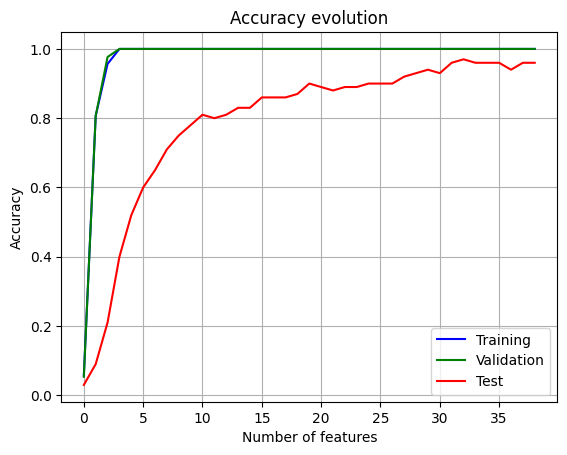

In [18]:
N_feat_max = n_classes-1 # As many new features as classes minus 1

# 1. Obtain CCA projections
cca = CCA(n_components=N_feat_max)
cca.fit(X_train2, Y_train_bin2)
P_train_cca = cca.transform(X_train2)
P_test_cca = cca.transform(X_test)

# 2. Compute SVM performance
range_k = np.arange(N_feat_max)
acc_val = np.zeros((len(range_k),))
acc_train = np.zeros((len(range_k),))
acc_test = np.zeros((len(range_k),))
clf = svm.SVC(kernel='linear')
param_grid = {
    'C': np.logspace(-2,2,5)
}

for i, k in enumerate(range_k):
  # CV with GridSearchCV
  grid = GridSearchCV(clf, param_grid, cv=3)
  grid.fit(P_train_cca[:,:k+1], Y_train2)

  # Test
  acc_train[k] = grid.score(P_train_cca[:,:k+1],Y_train2)
  acc_test[k] = grid.score(P_test_cca[:,:k+1],Y_test)
  acc_val[k] = grid.best_score_

# Select optimum points
pos_val = np.argmax(acc_val)
print('The number of selected features is %d'%(range_k[pos_val]))
test_acc_opt = acc_test[pos_val]
print("The optimum test accuracy is  %2.2f%%" %(100*test_acc_opt))


plt.figure()
plt.plot(acc_train, "b", label="train")
plt.plot(acc_val, "g", label="validation")
plt.plot(acc_test, "r", label="test")
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.title('Accuracy evolution')
plt.legend(['Training', 'Validation', 'Test'], loc = 4)
plt.grid()
plt.show()

### Solution 2

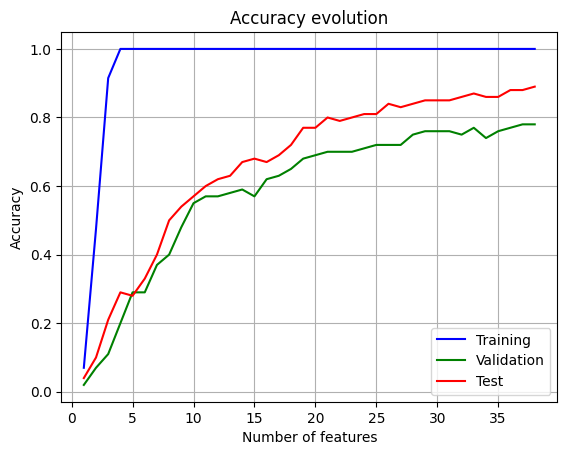

Number optimum of features: 36
The optimum test accuracy is  88.00%


In [19]:
from sklearn.cross_decomposition import CCA

N_feat_max = n_classes-1 # As many new features as classes minus 1
# 1. Obtain CCA projections
cca = CCA(n_components=N_feat_max)
cca.fit(X_train, Y_train_bin)
P_train_cca = cca.transform(X_train)
P_val_cca = cca.transform(X_val)
P_test_cca = cca.transform(X_test)


# 2. Compute and plot accuracy evolution
[acc_tr, acc_val, acc_test] = SVM_accuracy_evolution(P_train_cca, Y_train, P_val_cca, Y_val, P_test_cca, Y_test)

plt.figure()
plt.plot(range(1,P_train_cca.shape[1]),acc_tr, "b", label="train")
plt.plot(range(1,P_train_cca.shape[1]),acc_val, "g", label="validation")
plt.plot(range(1,P_train_cca.shape[1]),acc_test, "r", label="test")
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.title('Accuracy evolution')
plt.legend(['Training', 'Validation', 'Test'], loc = 4)
plt.grid()
plt.show()
# 3. Find the optimum number of features
pos_max = np.argmax(acc_val)
rang_feat = np.arange(N_feat_max)
num_opt_feat = rang_feat[pos_max]
test_acc_opt = acc_test[pos_max]

print('Number optimum of features: %d' %(num_opt_feat))
print("The optimum test accuracy is  %2.2f%%" %(100*test_acc_opt))

## 5.3 Evaluation of Linear Discrimination Analysis (LDA)

Now, let's repeat the performance analysis que the [LDA()](http://scikit-learn.org/stable/modules/generated/sklearn.lda.LDA.html) method. Remember that, in classification problems, CCA is equivalent to LDA, so you should obtain similar results to those of the previous section.


In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

N_feat_max = n_classes-1 # As many new features as classes minus 1
# 1. Obtain LDA or CCA projections
lda = LinearDiscriminantAnalysis(n_components=N_feat_max)
lda.fit(X_train, Y_train)
P_train_lda = lda.transform(X_train)
P_val_lda = lda.transform(X_val)
P_test_lda = lda.transform(X_test)

# 2. Compute SVM performance
clf = svm.SVC(kernel='linear')
param_grid = {
    'C': np.logspace(-2,2,5)
}

# CV with GridSearchCV
grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(P_train_lda, Y_train)

# Test
acc_train = grid.score(P_train_lda,Y_train)
acc_test = grid.score(P_test_lda,Y_test)

print("The test accuracy is  %2.2f%%" %(100*acc_test))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


The test accuracy is  91.00%


**Some useful references**

If you want to go deeper into these methods, these papers can be useful for you:
* Wold S., Albano C., Dunn W.J., Edlund U., Esbensen K., Geladi P., Hellberg S., Johansson E., Lindberg W. and Sjostrom M. (1984). Multivariate data analysis in chemistry Chemometrics, Mathematics and Statistics in Chemistry Reidel Publishing Company p. 17.
* Geladi P. (1988). Notes on the history and nature of partial least squares (PLS) modelling. Journal of Chemometrics 2, 231–246.
* Hardoon D.R., Szedmak S. and Shawe-Taylor J. (2003). Canonical correlation analysis: An overview with application to learning methods. Technical report.
* Worsley K, Poline J, Friston K and Evans. A. (1998). Characterizing the response of pet and fMRI data using multivariate linear models (MLM). Neuroimage 6, 305–319.


# 5. Kernel Multivariate Analysis


## 5.1 Motivation of KMVA

Previous MVA models are **linear** methods, so they are simple, easy to understand, robust to overfitting problems. However, they lack expressive power.

<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/PCA/Linear.jpg" width="60%">

**Solution**: no linear extension by means of kernel methods!!!



## 5.2 Kernel methods: review

* Idea: Project data onto a another space (usually with a dimensionality larger than that of the original space)

<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/PCA/kernel.jpg" width="60%">

... and run a linear algorithm run in this *feature space*. The outcome of the linear model in *feature space* turns out to be a non-linear model in the original input space.

Some useful results:

* **Kernel Trick**: It is possible to compute inner products in many $\infty$-dimensional space:
$$ k\left( {\bf x}, {\bf y}\right) = \left\langle \boldsymbol \phi({\bf x}), \boldsymbol \phi({\bf y}) \right\rangle $$
So, if a linear algorithm can be reformulated in terms of inner products, we can replace these dot products by kernel functions.
* **Representer Theorem**:  states that the solutions of certain optimization problems can be written as a linear combination of the training samples
$$ {\bf u} = \sum_{n=1}^N a^{(n)} \boldsymbol \phi({\bf x}^{(n)}) = \Phi {\bf a}$$
where the vector ${\bf a} = \left[ a^{(1)}, \ldots, a^{(N)} \right]^\top$ contains the dual variables which are indicating the weight that takes each data to represent the solution and $\boldsymbol \Phi  =  \left[ \boldsymbol  \phi({\bf x})^{(1)}, \ldots,\boldsymbol \phi({\bf x})^{(N)} \right]$ is a matrix with the data mapped in the feature space, one column per data instance.

## 5.3 Kernel Principal Component Analysis (KPCA): formulation

KPCA aims to find the projections that maximize the variance of the data in  **feature space**. This means to perform the PCA algorithm with matrix $\boldsymbol \Phi$:

###  Obtain the eigen spectrum of the covariance matrix in Feature Space $\boldsymbol \Sigma$.



- **Eigenvalue Problem**

$$ \boldsymbol \Sigma \mathbf u = \lambda \mathbf u \Rightarrow \frac{1}{N}\boldsymbol \Phi \boldsymbol \Phi^\top \mathbf u = \lambda \mathbf u $$

- **Eigenvectors are linear combinations of the data samples**:

$$
\mathbf u = \boldsymbol \Phi \mathbf a
$$

$$\frac{1}{N}\boldsymbol \Phi \boldsymbol \Phi^\top \boldsymbol \Phi \mathbf a = \lambda \boldsymbol \Phi \mathbf a $$

- Multiply the above equation by $\boldsymbol \Phi^\top$

$$ \frac{1}{N} \boldsymbol \Phi^\top \boldsymbol \Phi \boldsymbol \Phi^\top \boldsymbol \Phi \mathbf a = \lambda  \boldsymbol \Phi^\top \boldsymbol \Phi \mathbf a $$

- Remember the kernel matrix can be written as $K=\boldsymbol \Phi^\top \boldsymbol \Phi$

$$ \frac{1}{N}\bf K^2\mathbf a = \lambda \bf K \mathbf a $$

- Multiplication by $\bf K^{-1}$

$$ \frac{1}{N} \bf K \mathbf a = \lambda \mathbf a $$



The previous result states that if $\mathbf u$ is an eigenvector of the covariance matrix in feature space, $\boldsymbol \Sigma$, then $\mathbf a$, the vector with the dual coefficients of $\mathbf u$ in terms of the data samples, is an eigenvector of $\bf K$.

Moreover, if $\lambda$ is the eigenvalue of associated to $\mathbf u$, then $N\lambda$ is the eigenvalue that corresponds to $\mathbf a$.

This leads to the following **algorithm to compute the KPCA**


- **Input:** $\bf K$, kernel matrix

- **Process:**
    1. **Center** the kernel $\bf K \leftarrow \bf K - \frac{1}{N} \bf K \mathbf 1 \mathbf 1^\top - \frac{1}{N} \mathbf 1 \mathbf 1^\top \bf K + \frac{1}{N^2}  \mathbf 1 \mathbf 1^\top \bf K  \mathbf 1 \mathbf 1^\top$
    
    2. $\bf A, \Lambda$ = eig($\bf K$)
    
    3. $\bf Z = \bf K \bf A_{:K}$  

- **Output:** $\bf Z$, $N\times K$ matrix with the projection of all the samples on the $K$ principal components in feature space


$Z_{ik}$ is the projection of $\boldsymbol \phi(\mathbf x_i)$ on the $k$-th principal component.

$$Z_{ik} = \boldsymbol \phi(\mathbf x_i)^\top \boldsymbol \Phi \mathbf a_k = (\boldsymbol \Phi^\top)_i \boldsymbol \Phi \mathbf a_k = \bf K_i \mathbf a_k$$

**REFERENCE**

Scholkopf B., Smola A. and Muller K.R. (1998). Non linear component analysis as kernel eigenvalue problem. Neural Computation 10, 1299–1319.


### KPCA provides with more dimensions

- In the discussion of PCA we showed that when data lies in a subspace of smaller rank than the number of data feature, **PCA is able to optimally reduce the number of dimensions** in the projected data and recover that subspace

- With KPCA the intuition of the resulting number of dimensions of the projected data flows in the opposite direction. Remember the Kernel Principal Components are the eigenvectors of the Kernel Matrix. Therefore the **upper limit of the number of Kernel Principal Components is the number of data, $N$**.

- Intuitively, KPCA can give as many Principal Components as training samples, providing the used kernel yields a full rank kernel matrix.

- For instance, in the case of an RBF kernel with a spread parameter $\gamma$ large enough (narrow Gaussians), the kernel matrix will have full rank. The kernel matrix can be regarded as a new data matrix in which the coordinates of each point are the evaluations of the kernel function centred on each training sample.

## 5.4 Kernel Partial Least Square (KPLS)

**Review linear formulation**

$$ {\bf U, V} =   \underset{\bf U, V} {\mathrm{argmax}} ~{\rm Tr} \left\lbrace{\bf U}^T {\bf X}^T {\bf Y} {\bf V} \right\rbrace \quad \quad {\rm s.t.} ~~{\bf U}^T{\bf U}= {\bf V}^T{\bf V}={\bf I}$$

Applying a similar procedure to KPCA, we get the following **kernel formulation**

$$ {\bf A, V} =  \underset{\bf A, V} {\mathrm{argmax}} ~{\rm Tr} \left\lbrace{\bf A}^T {\bf K} {\bf Y} {\bf V} \right\rbrace \quad \quad {\rm s.t.} ~~{\bf A}^T {\bf K} {\bf A}= {\bf V}^T{\bf V}={\bf I}$$
which solution is given by
$$ {\bf A} ,{\bf V} = {\rm svd}\left( {\bf K}{\bf Y} \right) $$




## 5.5 Kernel Canonical Correlation Analysis (KCCA)


**Review linear formulation**
$$ \begin{array}{rl}
{\bf U, V} = &  \underset{\bf U, V} {\mathrm{argmax}} ~{\rm Tr} \left\lbrace {\bf U}^T{\bf X}^T{\bf Y} {\bf V} \right\rbrace \\
 & {\rm s.t.} ~~{\bf U}^T {\bf X}^T {\bf X} {\bf U}= {\bf V}^T {\bf Y}^T {\bf Y} {\bf V} = {\bf I}
\end{array}$$

Then, we can obtain the following **kernel formulation**

$$ \begin{array}{rl}{\bf A, V} = &  \underset{\bf A, V} {\mathrm{argmax}} ~{\rm Tr} \left\lbrace {\bf A}^T {\bf K} {\bf Y} {\bf V} \right\rbrace\\
 & {\rm s.t.} ~~{\bf A}^T {\bf K}{\bf K}{\bf A}= {\bf V}^T {\bf Y}^T{\bf Y} {\bf V}={\bf I}
\end{array}$$



# 6. Playing with KPCA

## 6.1 Creating a toy problem

The following code let you generate a bidimensional problem consisting of thee circles of data with different radius, each one associated to a different class.

As expected from the geometry of the problem, the classification boundary is not linear, so we will able to analyze the advantages of using no linear feature extraction techniques to transform the input space to a new space where a linear classifier can provide an accurate solution.

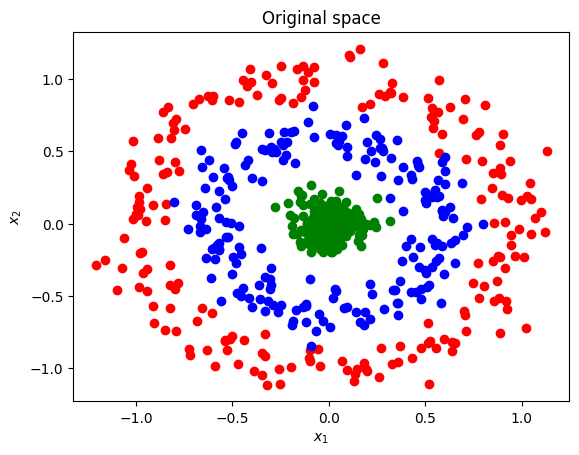

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt


np.random.seed(0)
X, Y = make_circles(n_samples=400, factor=.6, noise=.1)

X_c2 = 0.1*np.random.randn(200,2)
Y_c2 = 2*np.ones((200,))

X= np.vstack([X,X_c2])
Y= np.hstack([Y,Y_c2])

plt.figure()
plt.title("Original space")
reds = Y == 0
blues = Y == 1
green = Y == 2

plt.plot(X[reds, 0], X[reds, 1], "ro")
plt.plot(X[blues, 0], X[blues, 1], "bo")
plt.plot(X[green, 0], X[green, 1], "go")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

# split into a training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

# Normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Binarize the labels for supervised feature extraction methods
set_classes = np.unique(Y)
Y_train_bin = label_binarize(Y_train, classes=set_classes)
Y_test_bin = label_binarize(Y_test, classes=set_classes)


## 6.2 KPCA in sklearn

To extend the previous PCA feature extraction approach to its non-linear version, we can use of [KernelPCA( )](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA) function.

To analyze the advantages of the non linear feature extraction, let's compare it with its linear version. So, let's start computing both linear and kernelized versions of PCA. Next code obtains the variables (P_train, P_test) and (P_train_k, P_test_k) which contain, respectively, the projected data of the linear PCA and the KPCA.

To start to work, let's compute a maximum of two new projected features and consider a Radial Basis Function kernel (RBF) with gamma (the kernel parameter) fixed to 1.

In [26]:
from sklearn.decomposition import PCA, KernelPCA

N_feat_max=2
gamma_value = 1 #0.001 #1000

# Learn a linear PCA of two components
# Transform the training set onto the new components: X_train -> P_train
# Transform the test set onto the new components: X_test -> P_test

pca = PCA(n_components=N_feat_max).fit(X_train)
P_train = pca.transform(X_train)
P_test = pca.transform(X_test)

# Learn a kernel PCA of two components with an RBF kernel and spread parameter gamma given above
# Transform the training set onto the new components: X_train -> P_train_k
# Transform the test set onto the new components: X_test -> P_test_k

kpca = KernelPCA(n_components=N_feat_max, kernel='rbf', gamma=gamma_value)
kpca.fit(X_train)
P_train_k = kpca.transform(X_train)
P_test_k = kpca.transform(X_test)


Now, let's evaluate the discriminatory capability of the projected data (both linear and kernelized ones) feeding with them a linear SVM and measuring its accuracy over the test data using either the linear PCA projected data or the KPCA ones.

In [27]:
# Define SVM classifier
from sklearn import svm
clf = svm.SVC(kernel='linear')


clf.fit(P_train, Y_train)
acc_tr =  clf.score(P_train, Y_train)
acc_tst = clf.score(P_test, Y_test)

clf.fit(P_train_k, Y_train)
acc_tr_k =  clf.score(P_train_k, Y_train)
acc_tst_k = clf.score(P_test_k, Y_test)

print("Linear PCA")
print("----------")
print("Accuracy training set: {0:.2f}".format(acc_tr*100))
print("Accuracy test set: {0:.2f}".format(acc_tst*100))
print("")
print("Kernel PCA")
print("----------")
print("Accuracy training set: {0:.2f}".format(acc_tr_k*100))
print("Accuracy test set: {0:.2f}".format(acc_tst_k*100))
print("")



Linear PCA
----------
Accuracy training set: 36.44
Accuracy test set: 24.00

Kernel PCA
----------
Accuracy training set: 36.44
Accuracy test set: 24.00



Finally, next code plots the projected data

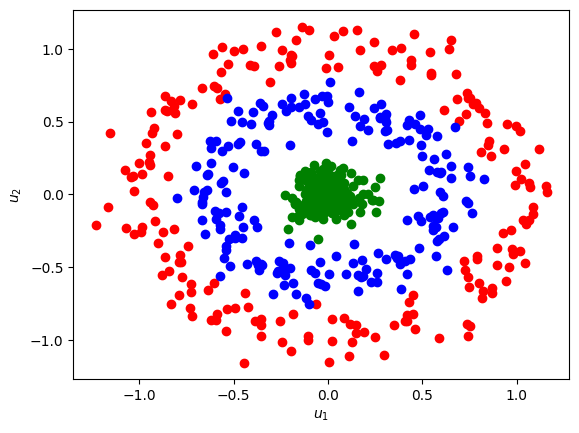

In [28]:
P_ = pca.transform(X)
Pk_=kpca.transform(X)
plt.plot(P_[reds, 0], P_[reds, 1], "ro")
plt.plot(P_[blues, 0], P_[blues, 1], "bo")
plt.plot(P_[green, 0], P_[green, 1], "go")
plt.xlabel("$u_1$")
plt.ylabel("$u_2$")
plt.show()

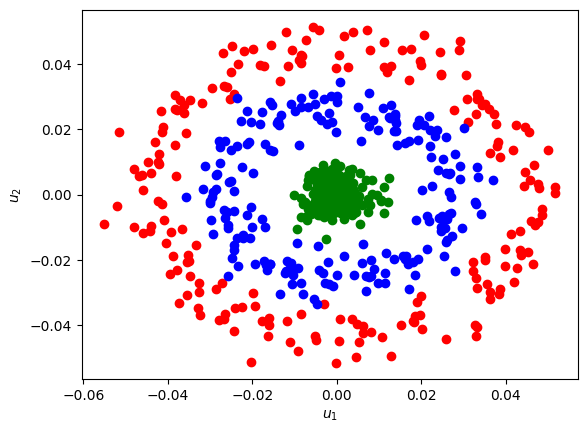

In [29]:
plt.plot(Pk_[reds, 0], Pk_[reds, 1], "ro")
plt.plot(Pk_[blues, 0], Pk_[blues, 1], "bo")
plt.plot(Pk_[green, 0], Pk_[green, 1], "go")
plt.xlabel("$u_1$")
plt.ylabel("$u_2$")
plt.show()

## 6.3 Implementation of Kernel MVA approaches

Until now, we have only used the KPCA approach because is the only not linear feature extraction method that it is included in Scikit-Learn.

However, if we compare linear and kernel versions of MVA approaches, we could extend any linear MVA approach to its kernelized version. In this way, we can use the same methods reviewed for the linear approaches and extend them to its non-linear fashion calling it with the training kernel matrix, instead of the training data, and the method would learn the dual variables, instead of the eigenvectors.

The following table relates both approaches:

|                           |        Linear             |           Kernel           |
|------                     |---------------------------|----------------------------|
|Input data                 |      ${\bf X}$            |         ${\bf K}$          |
|Variables to compute (fit) |Eigenvectors (${\bf U}$)   |Dual variables (${\bf A}$)  |
|Projection vectors         |      ${\bf U}$            |${\bf U}=\Phi^T {\bf A}$ (cannot be computed) |
|Project data (transform)   |${\bf X}' = {\bf U}^T {\bf X}^T$|${\bf X}' ={\bf  A}^T \Phi \Phi^T = {\bf  A}^T {\bf K}$|


### Computing and centering kernel matrix

Let's start this section computing the different kernel matrix that we need to train and evaluate the different feature extraction methods. For this example, we are going to consider a Radial Basis Function kernel (RBF), where each element of the kernel matrix is given by
$$k(x_i,x_j) = \exp (- \gamma (x_i -x_j)^2)$$

In particular, we need to compute two kernel matrix:
* Training data kernel matrix (`K_tr`)  where the RBF is compute pairwise over the training data. The resulting matrix dimension is of $N_{tr} \times N_{tr}$, being $N_{tr}$ the number of training data.
* Test data kernel matrix (`K_test`) where the RBF is compute between training and test samples, i.e., in RBF expression the data $x_i$ belongs to test data whereas $x_j$ belongs to training data. The resulting matrix dimension is of $N_{test} \times N_{tr}$, being $N_{test}$ and $N_{tr}$ the number of test and training data, respectively.

Let's use the [rbf_kernel( )](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.rbf_kernel.html) function to compute the `K_tr` and `K_test` kernel matrix. In this case, let's fix the kernel width value (`gamma`) to 1.

In [30]:
# Computing the kernel matrix
from sklearn.metrics.pairwise import rbf_kernel

g_value = 1

# Compute the kernel matrix (use the X_train matrix, before dividing it in validation and training data)
K_tr = rbf_kernel(X_train, gamma = g_value)
K_test  = rbf_kernel(X_test, X_train,  gamma = g_value)

After compute these kernel matrix, they have to be centered (in the same way that we remove the mean when we work over the input space). For this purpose, next code provides you the function `center_K()`  to remove the mean of both K_tr and K_test matrix.

In [31]:
def center_K(K):
    """Center a kernel matrix K, i.e., removes the data mean in the feature space.

    Args:
        K: kernel matrix
    """
    size_1,size_2 = K.shape;
    D1 = K.sum(axis=0)/size_1
    D2 = K.sum(axis=1)/size_2
    E = D2.sum(axis=0)/size_1

    K_n = K + np.tile(E,[size_1,size_2]) - np.tile(D1,[size_1,1]) - np.tile(D2,[size_2,1]).T
    return K_n


# Center the kernel matrix
K_tr_c = center_K(K_tr)
K_test_c = center_K(K_test)

### Alternative KPCA formulation


### Exercise 5

Design a KPCA implementation using the linear PCA function and the kernel matrix as input data.



In [32]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn import svm

# Defining parameters
N_feat_max = 2

## PCA method (to complete)
# 1. Train PCA with the kernel matrix and project the data
# <SOL>
pca_K2 = PCA(n_components=N_feat_max)
pca_K2.fit(K_tr_c)
P_train_k2 = pca_K2.transform(K_tr_c)
P_test_k2 = pca_K2.transform(K_test_c)
# </SOL>
# 2. Evaluate the projection performance
# <SOL>
clf = svm.SVC(kernel='linear')
clf.fit(P_train_k2, Y_train)
print('Test accuracy with PCA with a kenel matrix as input: %2.2f' %(clf.score(P_test_k2, Y_test)))
# </SOL>



Test accuracy with PCA with a kenel matrix as input: 0.95


Now, we include standard PCA implementation for comparison purposes




In [33]:
## KPCA method
# 1. Train KPCA and project the data
# Fixing gamma to 0.5 here, it is equivalent to gamma=1 in rbf function
pca_K = KernelPCA(n_components=N_feat_max, kernel="rbf", gamma=0.5)
pca_K.fit(X_train)
P_train_k = pca_K.transform(X_train)
P_test_k = pca_K.transform(X_test)

# 2. Evaluate the projection performance
clf = svm.SVC(kernel='linear')
clf.fit(P_train_k, Y_train)
print('Test accuracy with KPCA: %2.2f' %(clf.score(P_test_k, Y_test)))



Test accuracy with KPCA: 0.96


Of course, similar kernel implementations can be obtained for PLS and CCA approaches.